In [1]:
using Distributions
using PyPlot

In [2]:
T = 50
ϕ = 0.8
ϵ_1 = 1.0
ε = randn(T);

In [3]:
x = zeros(T);

In [5]:
x[1] = ϵ_1;

In [6]:
for t = 2:T
    x[t] = ϕ * x[t-1] + ε[t]
end

In [7]:
function linregress(y,X)
    β = X \ y
    y_hat =β * X
    resids = y - y_hat
    return(β, resids)
end

linregress (generic function with 1 method)

In [8]:
a = x[1:T-1]
b = x[2:T];

In [10]:
β_hat, resids = linregress(a,b);

In [11]:
function parametric_Monte_Carlo(ϕ, obs, init)
    z = randn(obs) 
    y = zeros(obs);
    y[1] = init

    for t = 2:obs
        y[t] = ϕ * y[t-1] + z[t]
    end
    
    return y
end

parametric_Monte_Carlo (generic function with 1 method)

In [12]:
M = 10_000
Y = zeros(M)

for j in 1:M
    path = parametric_Monte_Carlo(β_hat, T, 0)
    Y[j] = path[end]
end

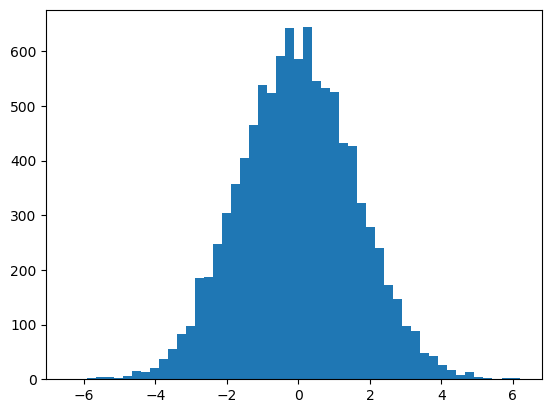

In [13]:
hist(Y,bins =50);